<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter07/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7 - SelectSearch
location 5028

In [1]:
!pip install selectivesearch
# torch snippets - utilities to simplify the code
# -- see book 
!pip install torch_snippets

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
from torch_snippets import *

In [3]:
import selectivesearch
from skimage.segmentation import felzenszwalb

In [4]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2020-12-15 17:32:02--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2020-12-15 17:32:02--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7953a23d4dcdeff86109d4039f.dl.dropboxusercontent.com/cd/0/inline/BFL-zczZO-CFS8Bd3KDDVwD1rBtPlJgSXvMH3ZkRbtapTtZSETMtpythmb_SeDpqz0hJz_N25U7ez-iSpWr58TNqIN-NtomJ1JgrUHds0Bj5LA/file# [following]
--2020-12-15 17:32:02--  https://uc7953a23d4dcdeff86109d4039f.dl.dropboxusercontent.com/cd/0/inline/BFL-zczZO-CFS8Bd3KDDVwD1rBtPlJgSXvMH3ZkRbtapTtZSETMtpythmb_SeDpqz0hJz_N25U7ez-iSpWr58TNqIN-NtomJ1JgrUHds0Bj5LA/file
Resolving uc795

In [5]:
segments_fz = felzenszwalb(img, scale=200)

## display segmentation from skimage
### Subplots Example

In [6]:
help(subplots)

Help on function subplots in module torch_snippets.loader:

subplots(ims, nc=5, figsize=(5, 5), **kwargs)



2020-12-15 17:32:03.686 | INFO     | torch_snippets.loader:subplots:385 - plotting 2 images in a grid of 1x2 @ (10, 10)


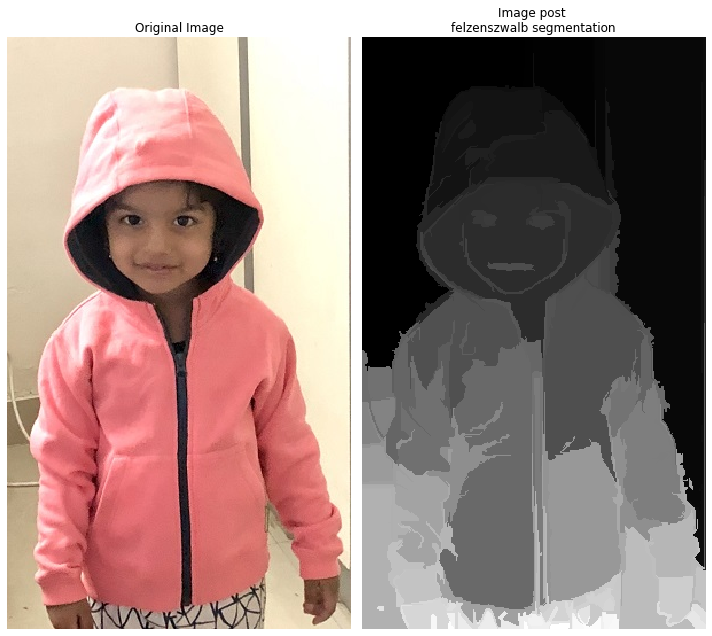

In [7]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

## candidates from selective search

In [8]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


## torch_snippets.show
nice example of displaying bbounding boxes on top of image w/ 1 line of code

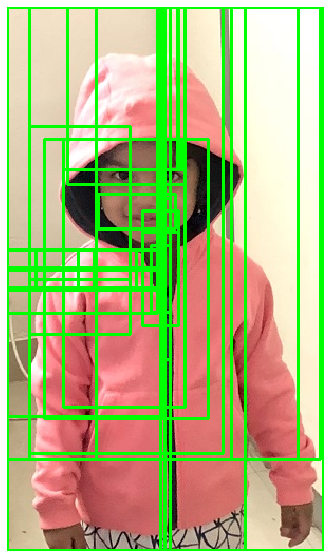

In [9]:
candidates = extract_candidates(img)
show(img, bbs = candidates)

## Data - copy some of your own images up to the environment

In [13]:
# img = read('16061532739-1-3-c.jpg', 1)
img = read('16061528611-5-2-c.jpg', 1)

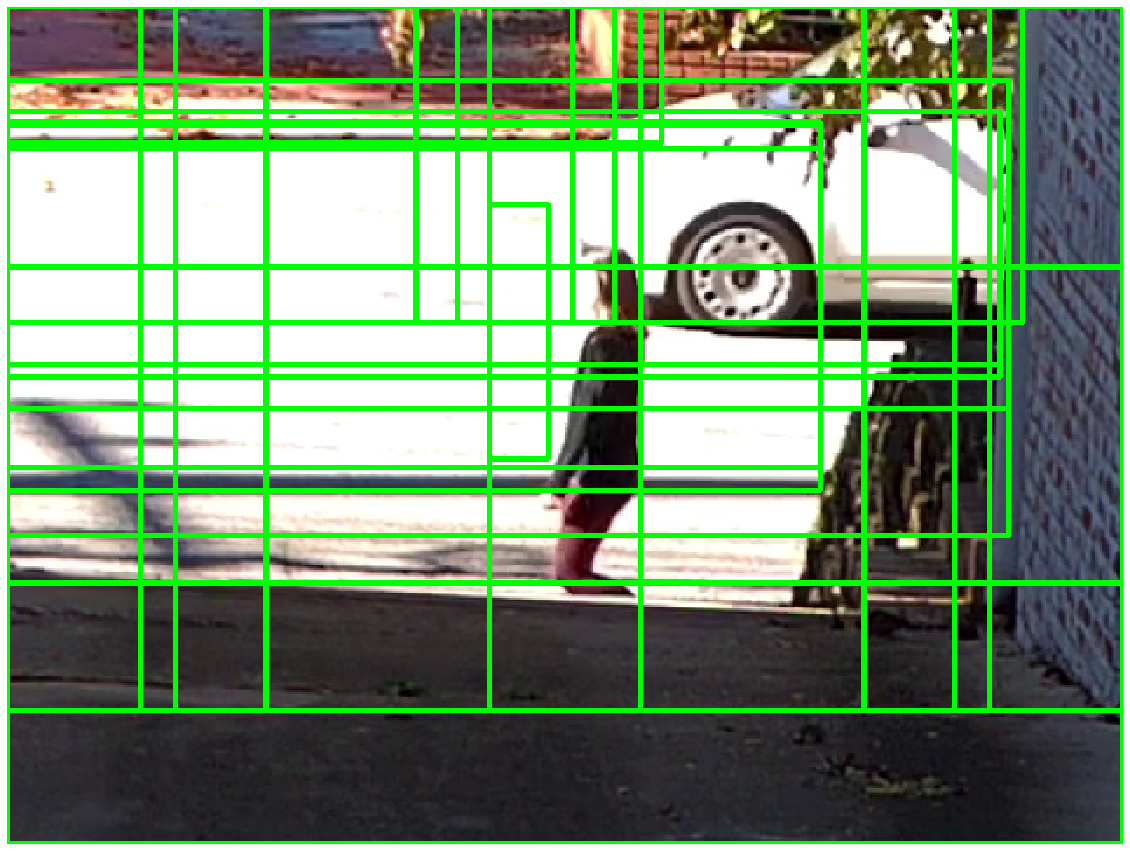

In [14]:
candidates = extract_candidates(img)
show(img, bbs = candidates)

In [15]:
print (len(candidates))

79
